In [2]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Что надо сделать:
    1. написать код для загрузки файлов из google drive и создания из них датасетов
    2. добавить скаченные файлы сразу же в gitignore!
    3. навести порядок в коде
    4. доделать анализ по разным признакам

Загружаем исходные датасеты.

In [3]:
url = 'https://drive.google.com/file/d/10ArXJ6QnquvNQzXpbxeEuQY2Af8LXddP/view?usp=drive_link'
output_path = 'lectures.csv'
gdown.download(url, output_path, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=10ArXJ6QnquvNQzXpbxeEuQY2Af8LXddP
To: c:\Users\soyan\YandexDisk\Моё\МФТИ\Python\HomeWork\lectures.csv
100%|██████████| 9.70k/9.70k [00:00<00:00, 1.08MB/s]


'lectures.csv'

In [4]:
url = 'https://drive.google.com/file/d/1x4ybKLXnKUdW-EINwnVG_kJmLzfOTWE1/view?usp=drive_link'
output_path = 'questions.csv'
gdown.download(url, output_path, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1x4ybKLXnKUdW-EINwnVG_kJmLzfOTWE1
To: c:\Users\soyan\YandexDisk\Моё\МФТИ\Python\HomeWork\questions.csv
100%|██████████| 296k/296k [00:00<00:00, 1.30MB/s]


'questions.csv'

In [5]:
url = 'https://drive.google.com/file/d/1vzcGaLF0DE_WcynJgFAhD7FFeAe6EnTL/view?usp=drive_link'
output_path = 'train.csv'
gdown.download(url, output_path, quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1vzcGaLF0DE_WcynJgFAhD7FFeAe6EnTL
From (redirected): https://drive.google.com/uc?id=1vzcGaLF0DE_WcynJgFAhD7FFeAe6EnTL&confirm=t&uuid=3ad3527a-2cf6-4755-8b79-9630c775d4d2
To: c:\Users\soyan\YandexDisk\Моё\МФТИ\Python\HomeWork\train.csv
100%|██████████| 5.85G/5.85G [03:12<00:00, 30.4MB/s]


'train.csv'

Cоздаём три датасета по исходным файлам и упорядочиваем значения в них по отдельным столбцам. Датасеты сохраняем в локальном хранилище, и добавляем их в gitignore.

In [3]:
# Чтение CSV файла
df_lectures = pd.read_csv('C:/Users/soyan/YandexDisk/Моё/МФТИ/Python/HomeWork/lectures.csv', sep='\t')

In [4]:
# Проверяем исходный датасет
df_lectures

,"lecture_id,tag,part,type_of"
0,"89,159,5,concept"
1,"100,70,1,concept"
2,"185,45,6,concept"
3,"192,79,5,solving question"
4,"317,156,5,solving question"
...,...
413,"32535,8,5,solving question"
414,"32570,113,3,solving question"
415,"32604,24,6,concept"
416,"32625,142,2,concept"


In [5]:
# Разделение столбца на новые столбцы
df_split = df_lectures['lecture_id,tag,part,type_of'].str.split(',', expand=True)

# Задать новые имена для столбцов
df_split.columns = ['lecture_id', 'tag', 'part', 'type_of']

# Объединение с исходным DataFrame
df_lectures = df_split

In [6]:
# Проверяем получившийся датасет
df_lectures

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [7]:
df_questions = pd.read_csv('C:/Users/soyan/YandexDisk/Моё/МФТИ/Python/HomeWork/questions.csv', sep='\t')

In [8]:
# Проверяем исходный датасет
df_questions

,"question_id,bundle_id,correct_answer,part,tags"
0,"0,0,0,1,51 131 162 38"
1,"1,1,1,1,131 36 81"
2,"2,2,0,1,131 101 162 92"
3,"3,3,0,1,131 149 162 29"
4,"4,4,3,1,131 5 162 38"
...,...
13518,"13518,13518,3,5,14"
13519,"13519,13519,3,5,8"
13520,"13520,13520,2,5,73"
13521,"13521,13521,0,5,125"


In [9]:
# Разделение столбца на новые столбцы
df_split_q = df_questions['question_id,bundle_id,correct_answer,part,tags'].str.split(',', expand=True)

# Задать новые имена для столбцов
df_split_q.columns = ['question_id', 'bundle_id','correct_answer', 'part', 'tags']

# Объединение с исходным DataFrame
df_questions = df_split_q

In [10]:
# Проверяем получившийся датасет
df_questions

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


Третий датасет достаточно большой, более 5 гб, поэтому нужно упростить работу с ним, чтобы не перегружать память и не тратить на это время

In [12]:
# Загружаем датасет и ограничиваем чтение в количестве 10^7 строк
df_train = pd.read_csv('C:/Users/soyan/YandexDisk/Моё/МФТИ/Python/HomeWork/train.csv', nrows=10000000, sep='\t')

In [13]:
# Проверяем исходный датасет
df_train

,"row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation"
0,"0,0,115,5692,0,1,3,1,,"
1,"1,56943,115,5716,0,2,2,1,37000.0,False"
2,"2,118363,115,128,0,0,0,1,55000.0,False"
3,"3,131167,115,7860,0,3,0,1,19000.0,False"
4,"4,137965,115,7922,0,4,1,1,11000.0,False"
...,...
9999995,"9999995,646228695,216747867,8805,0,410,1,1,230..."
9999996,"9999996,646321314,216747867,5708,0,411,0,0,130..."
9999997,"9999997,646393443,216747867,5434,0,412,0,0,660..."
9999998,"9999998,646445632,216747867,6429,0,413,3,1,370..."


In [14]:
# Разделение столбца на новые столбцы
df_split_t = df_train['row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation'].str.split(',', expand=True)

# Задать новые имена для столбцов
df_split_t.columns = ['row_id', 
                      'timestamp',
                      'user_id', 
                      'content_id', 
                      'content_type_id', 
                      'task_container_id', 
                      'user_answer', 
                      'answered_correctly', 
                      'prior_question_elapsed_time',
                      'prior_question_had_explanation']

# Объединение с исходным DataFrame
df_train = df_split_t

In [15]:
# Проверяем обновленный датасет
df_train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,,
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
9999995,9999995,646228695,216747867,8805,0,410,1,1,23000.0,True
9999996,9999996,646321314,216747867,5708,0,411,0,0,13000.0,True
9999997,9999997,646393443,216747867,5434,0,412,0,0,66000.0,True
9999998,9999998,646445632,216747867,6429,0,413,3,1,37000.0,True


Создаём один общий датасет для анализа данных. Из предоставленного описания датасетов можно выбрать признак, по которому можно объединить 3 датасета в один, для проведения анализа. Общие признаки:
Объединение train.csv и questions.csv:
content_id (из train.csv) и question_id (из questions.csv)

Объединение train.csv и lectures.csv
Общие признаки:
content_id (из train.csv) и lecture_id (из lectures.csv)

После этого можно объединить два получившихся датасета в один через contact

In [16]:
#Объединение train.csv и questions.csv
merged_train_questions = pd.merge(df_train, df_questions, left_on='content_id', right_on='question_id')

In [18]:
# Проверяем обновленный датасет
merged_train_questions

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,0,0,115,5692,0,1,3,1,,,5692,5692,3,5,151
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,5716,2,5,168
2,2,118363,115,128,0,0,0,1,55000.0,False,128,128,0,1,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,7860,0,1,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,7922,1,1,131 149 92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881049,9999995,646228695,216747867,8805,0,410,1,1,23000.0,True,8805,8805,1,5,170
9881050,9999996,646321314,216747867,5708,0,411,0,0,13000.0,True,5708,5708,2,5,127
9881051,9999997,646393443,216747867,5434,0,412,0,0,66000.0,True,5434,5434,1,5,125
9881052,9999998,646445632,216747867,6429,0,413,3,1,37000.0,True,6429,6429,3,5,170


In [19]:
#Объединение train.csv и lectures.csv
merged_train_lectures = pd.merge(df_train, df_lectures, left_on='content_id', right_on='lecture_id')

In [20]:
# Проверяем обновленный датасет
merged_train_lectures

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,part,type_of
0,18,437272,115,7926,0,18,1,1,18000.0,False,7926,57,5,concept
1,23,557677,115,185,0,23,3,0,21000.0,False,185,45,6,concept
2,30,710402,115,100,0,30,0,1,20000.0,False,100,70,1,concept
3,89,653762,2746,6808,1,14,-1,-1,,False,6808,129,2,intention
4,95,835457,2746,484,0,19,0,1,20000.0,True,484,179,5,concept
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324810,9999875,476351673,216747867,23855,1,352,-1,-1,,False,23855,106,4,concept
324811,9999905,513697222,216747867,30681,1,361,-1,-1,,False,30681,106,4,solving question
324812,9999936,529318881,216747867,7704,0,371,0,1,38500.0,True,7704,116,5,solving question
324813,9999938,529899038,216747867,29559,1,372,-1,-1,,False,29559,113,4,solving question


In [21]:
# Создаём финальный датасет для анализа
df_final = pd.concat([merged_train_questions, merged_train_lectures], axis=0)

In [22]:
# Проверяем финальный датасет
df_final

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags,lecture_id,tag,type_of
0,0,0,115,5692,0,1,3,1,,,5692,5692,3,5,151,NaN,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,5716,2,5,168,NaN,NaN,NaN
2,2,118363,115,128,0,0,0,1,55000.0,False,128,128,0,1,131 149 92,NaN,NaN,NaN
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,7860,0,1,131 104 81,NaN,NaN,NaN
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,7922,1,1,131 149 92,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324810,9999875,476351673,216747867,23855,1,352,-1,-1,,False,NaN,NaN,NaN,4,NaN,23855,106,concept
324811,9999905,513697222,216747867,30681,1,361,-1,-1,,False,NaN,NaN,NaN,4,NaN,30681,106,solving question
324812,9999936,529318881,216747867,7704,0,371,0,1,38500.0,True,NaN,NaN,NaN,5,NaN,7704,116,solving question
324813,9999938,529899038,216747867,29559,1,372,-1,-1,,False,NaN,NaN,NaN,4,NaN,29559,113,solving question


Анализ объединенного датасета
обычно из стандартного:
- поиск дубликатов (тут их нет)
- анализ пропусков (там есть глубинные дебри по поиску зависимостей между пропущенными значениями, но это для особо упоротых)
в этом датасете пропусков нет, так что забейте
- анализ распределений (смотрим далеко ли медиана от среднего, рисуем графики, смотрим есть ли хвосты справа или слева)
- поиск выбросов и аномалий (боксплот покажет наиболее выдающиеся значения, дальше принятие решений удалять их или нет) в этом датасете этого нет
- поиск корреляций по методу пирсона или phik

это минимум по стандартам
далее творческая деятельность, прикладываем все свои навыки в визуализациях и всяческом кручении данных, чтоб находить интересные зависимости, интервалы, прочие особенности

In [23]:
# Смотрим информацию о нашем df
df_final.info

<bound method DataFrame.info of          row_id  timestamp    user_id content_id content_type_id  \
0             0          0        115       5692               0   
1             1      56943        115       5716               0   
2             2     118363        115        128               0   
3             3     131167        115       7860               0   
4             4     137965        115       7922               0   
...         ...        ...        ...        ...             ...   
324810  9999875  476351673  216747867      23855               1   
324811  9999905  513697222  216747867      30681               1   
324812  9999936  529318881  216747867       7704               0   
324813  9999938  529899038  216747867      29559               1   
324814  9999960  605055608  216747867       3153               0   

       task_container_id user_answer answered_correctly  \
0                      1           3                  1   
1                      2         

In [25]:
# Какие столбцы в нашем финальном датасете
print("Столбцы в train:", df_final.columns)

Столбцы в train: Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation',
       'question_id', 'bundle_id', 'correct_answer', 'part', 'tags',
       'lecture_id', 'tag', 'type_of'],
      dtype='object')


In [26]:
# Смотрим размерность нашего датасета
df_final.shape

(10205869, 18)

In [24]:
# Проверяем наличие дубликатов в датасете
df_final.duplicated().any()

np.False_

In [27]:
# Посмотреть на статистическое описание числовых данных в датасете
df_final.describe


<bound method NDFrame.describe of          row_id  timestamp    user_id content_id content_type_id  \
0             0          0        115       5692               0   
1             1      56943        115       5716               0   
2             2     118363        115        128               0   
3             3     131167        115       7860               0   
4             4     137965        115       7922               0   
...         ...        ...        ...        ...             ...   
324810  9999875  476351673  216747867      23855               1   
324811  9999905  513697222  216747867      30681               1   
324812  9999936  529318881  216747867       7704               0   
324813  9999938  529899038  216747867      29559               1   
324814  9999960  605055608  216747867       3153               0   

       task_container_id user_answer answered_correctly  \
0                      1           3                  1   
1                      2       

Анализ пропусков в датасете. 

In [28]:
# Подсчет пропущенных значений по каждому столбцу
def analyze_missing_values(df_final):
    # Подсчет пропущенных значений по каждому столбцу
    missing_count = df_final.isnull().sum()
    
    # Подсчет процента пропущенных значений
    missing_percentage = round((missing_count / len(df_final)) * 100, 2)
    
    # Создание нового датафрейма
    missing_df = pd.DataFrame({
        'Столбцы': missing_count.index,
        'Количество пропущенных строк': missing_count.values,
        '% пропущенных значений': missing_percentage.values
    })
    
    # Фильтрация только тех столбцов, где есть пропуски
    missing_df = missing_df[missing_df['Количество пропущенных строк'] > 0].reset_index(drop=True)
    
    return missing_df

missing_data = analyze_missing_values(df_final)
missing_data

,Столбцы,Количество пропущенных строк,% пропущенных значений
0,question_id,324815,3.18
1,bundle_id,324815,3.18
2,correct_answer,324815,3.18
3,tags,324815,3.18
4,lecture_id,9881054,96.82
5,tag,9881054,96.82
6,type_of,9881054,96.82


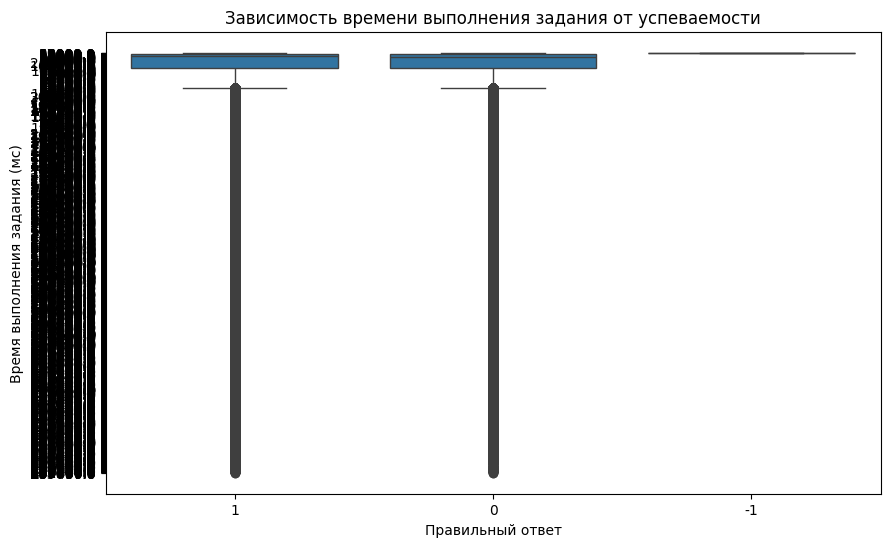

In [101]:
# Проверка распределения времени выполнения заданий
df_final['prior_question_elapsed_time'].describe()

# Визуализация зависимости времени выполнения на успешность

plt.figure(figsize=(10, 6))
sns.boxplot(x='answered_correctly', y='prior_question_elapsed_time', data=df_final)
plt.title('Зависимость времени выполнения задания от успеваемости')
plt.xlabel('Правильный ответ')
plt.ylabel('Время выполнения задания (мс)')
plt.show()

answered_correctly
1     6543997
0     3390026
-1     271846
Name: count, dtype: int64


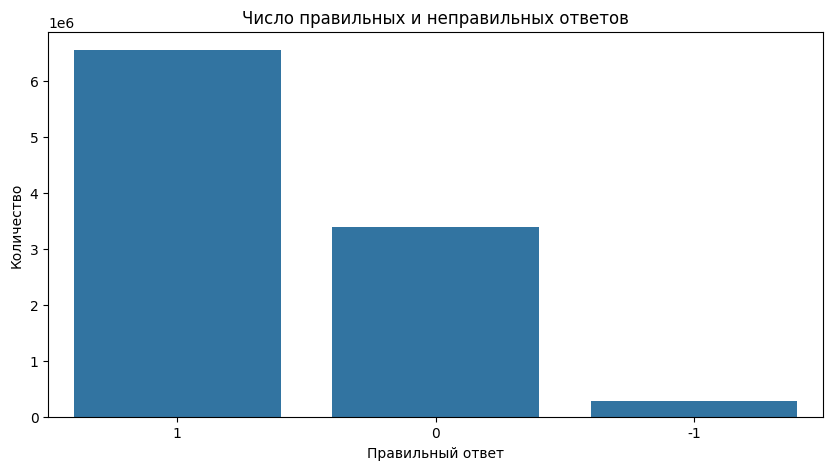

In [105]:
# Частота правильных и неправильных ответов
response_counts = df_final['answered_correctly'].value_counts()
print(response_counts)

# Визуализация результатов
plt.figure(figsize=(10, 5))
sns.countplot(x='answered_correctly', data=df_final)
plt.title('Число правильных и неправильных ответов')
plt.xlabel('Правильный ответ')
plt.ylabel('Количество')
plt.show()

In [ ]:
# Успеваемость по частям
plt.figure(figsize=(10, 6))
sns.barplot(x='part', y='answered_correctly', data=df_final)
plt.title('Успеваемость по частям')
plt.xlabel('Часть')
plt.ylabel('Средний процент правильных ответов')
plt.show()

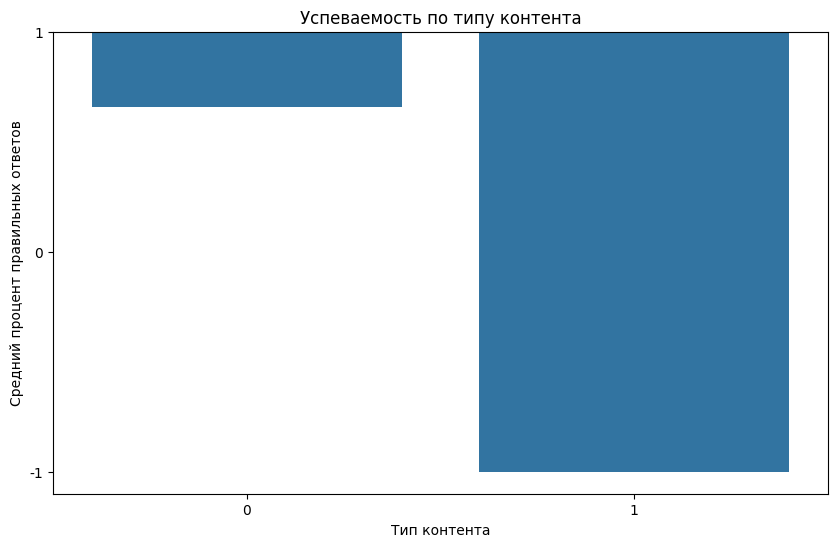

In [107]:
# Визуализация успеваемости по типу контента
plt.figure(figsize=(10, 6))
sns.barplot(x='content_type_id', y='answered_correctly', data=df_final)
plt.title('Успеваемость по типу контента')
plt.xlabel('Тип контента')
plt.ylabel('Средний процент правильных ответов')
plt.show()
